# AIT Development notebook

## notebook of structure

| #  | Name                                               | cells | for_dev | edit               | description                                                                |
|----|----------------------------------------------------|-------|---------|--------------------|----------------------------------------------------------------------------|
| 1  | [Environment detection](##1-Environment-detection) | 1     | No      | uneditable         | detect whether the notebook are invoked for packaging or in production     |
| 2  | [Preparing AIT SDK](##2-Preparing-AIT-SDK)         | 1     | Yes     | uneditable         | download and install AIT SDK                                               |
| 3  | [Dependency Management](##3-Dependency-Management) | 3     | Yes     | required(cell #2)  | generate requirements.txt for Docker container                             |
| 4  | [Importing Libraries](##4-Importing-Libraries)     | 2     | Yes     | required(cell #1)  | import required libraries                                                  |
| 5  | [Manifest Generation](##5-Manifest-Generation)     | 1     | Yes     | required           | generate AIT Manifest                                                      |
| 6  | [Prepare for the Input](##6-Prepare-for-the-Input) | 1     | Yes     | required           | generate AIT Input JSON (inventory mapper)                                 |
| 7  | [Initialization](##7-Initialization)               | 1     | No      | uneditable         | initialization for AIT execution                                           |
| 8  | [Function definitions](##8-Function-definitions)   | N     | No      | required           | define functions invoked from Main area.<br> also define output functions. |
| 9  | [Main Algorithms](##9-Main-Algorithms)             | 1     | No      | required           | area for main algorithms of an AIT                                         |
| 10 | [Entry point](##10-Entry-point)                    | 1     | No      | uneditable         | an entry point where Qunomon invoke this AIT from here                     |
| 11 | [License](##11-License)                            | 1     | Yes     | required           | generate license information                                               |
| 12 | [Deployment](##12-Deployment)                      | 1     | Yes     | uneditable         | convert this notebook to the python file for packaging purpose             |

## notebook template revision history

1.0.1 2020/10/21

* add revision history
* separate `create requirements and pip install` editable and noeditable
* separate `import` editable and noeditable

1.0.0 2020/10/12

* new cerarion

## body

### #1 Environment detection

[uneditable]

In [1]:
# Determine whether to start AIT or jupyter by startup argument
import sys
is_ait_launch = (len(sys.argv) == 2)

### #2 Preparing AIT SDK

[uneditable]

In [2]:
if not is_ait_launch:
    # get ait-sdk file name
    from pathlib import Path
    from glob import glob
    import re
    import os

    current_dir = %pwd

    ait_sdk_path = "./ait_sdk-*-py3-none-any.whl"
    ait_sdk_list = glob(ait_sdk_path)
    ait_sdk_name = os.path.basename(ait_sdk_list[-1])

    # install ait-sdk
    !pip install -q --upgrade pip
    !pip install -q --no-deps --force-reinstall ./$ait_sdk_name

### #3 Dependency Management

#### #3-1 [uneditable]

In [3]:
if not is_ait_launch:
    from ait_sdk.common.files.ait_requirements_generator import AITRequirementsGenerator
    requirements_generator = AITRequirementsGenerator()

#### #3-2 [required]

In [4]:
if not is_ait_launch:
    requirements_generator.add_package('pandas', '2.0.3')
    requirements_generator.add_package('numpy','1.26.4')
    requirements_generator.add_package('h5py','3.12.1')
    requirements_generator.add_package('torch','2.5.1')
    requirements_generator.add_package('matplotlib','3.9.2')
    requirements_generator.add_package('scikit-learn','1.5.2')

#### #3-3 [uneditable]

In [5]:
if not is_ait_launch:
    requirements_generator.add_package(f'./{ait_sdk_name}')
    requirements_path = requirements_generator.create_requirements(current_dir)

    !pip install -q -r $requirements_path 

### #4 Importing Libraries

#### #4-1 [required]

In [6]:
# import if you need modules cell

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KernelDensity
import h5py
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader


#### #4-2 [uneditable]

In [7]:
# must use modules
from os import path
import shutil  # do not remove
from ait_sdk.common.files.ait_input import AITInput  # do not remove
from ait_sdk.common.files.ait_output import AITOutput  # do not remove
from ait_sdk.common.files.ait_manifest import AITManifest  # do not remove
from ait_sdk.develop.ait_path_helper import AITPathHelper  # do not remove
from ait_sdk.utils.logging import get_logger, log, get_log_path  # do not remove
from ait_sdk.develop.annotation import measures, resources, downloads, ait_main  # do not remove
# must use modules

### #5 Manifest Generation

[required]

In [8]:
if not is_ait_launch:
    from ait_sdk.common.files.ait_manifest_generator import AITManifestGenerator
    manifest_genenerator = AITManifestGenerator(current_dir)
    manifest_genenerator.set_ait_name('alyz_dataset_surprise_coverage')
    manifest_genenerator.set_ait_description('モデルがテストデータに対して意外性のある入力をどれだけカバーしているかを測定することでデータセットの多様性を評価する。\nこれにより、データセットが異なる特徴を豊富に含んでいるかを把握することができる。分布に基づいた評価と空間的な距離に基づいた評価の2つの観点からデータセットの多様性を評価することでより安定した評価ができる。')
    manifest_genenerator.set_ait_source_repository('https://github.com/aistairc/Qunomon_AIT_alyz_dataset_surprise_coverage')
    manifest_genenerator.set_ait_version('1.1')
    manifest_genenerator.add_ait_licenses('Apache License Version 2.0')
    manifest_genenerator.add_ait_keywords('Surprise Coverage')
    manifest_genenerator.add_ait_keywords('DSA')
    manifest_genenerator.add_ait_keywords('LSA')
    manifest_genenerator.add_ait_keywords('image')
    manifest_genenerator.set_ait_quality('https://ait-hub.pj.aist.go.jp/ait-hub/api/0.0.1/qualityDimensions/機械学習品質マネジメントガイドライン第三版/B-1データセットの被覆性')
    #### Inventories
    inventory_requirement_dataset = manifest_genenerator.format_ait_inventory_requirement(format_=['h5'])
    manifest_genenerator.add_ait_inventories(name='train_dataset', 
                                             type_='dataset', 
                                             description='HDF5形式の学習用データセット。内部は2つのHDF5ファイルを用意する(ファイル名は任意)\n(1)モデルに入力される多次元配列を含むデータセット(データセット(1)の要素数はtrained_modelの入力層の要素数と一致)\n(2)データの各サンプルの正解ラベル（クラスのインデックス値）を含むデータセット(データセット(2)の要素数はtrained_modelの出力層の要素数と一致))\n\nファイル構造:\n sample.h5\n   ├── (1) 学習用入力データセット\n   └── (2) 学習用ラベルデータセット\n', 
                                             requirement= inventory_requirement_dataset)
    manifest_genenerator.add_ait_inventories(name='test_dataset', 
                                             type_='dataset', 
                                             description='HDF5形式のテスト用データセット。内部は2つのHDF5ファイルを用意する(ファイル名は任意)\n(1)モデルに入力される多次元配列を含むデータセット(データセット(1)の要素数はtrained_modelの入力層の要素数と一致)\n(2)データの各サンプルの正解ラベル（クラスのインデックス値）を含むデータセット(データセット(2)の要素数はtrained_modelの出力層の要素数と一致))\n\nファイル構造:\n sample.h5\n   ├── (1) テスト用入力データセット\n   └── (2) テスト用ラベルデータセット\n', 
                                             requirement= inventory_requirement_dataset)
    inventory_requirement_trained_model = manifest_genenerator.format_ait_inventory_requirement(format_=['pth'])
    manifest_genenerator.add_ait_inventories(name='trained_model', 
                                              type_='model', 
                                              description='torch.jit.save関数を使用しTorchScript形式で保存されたモデルデータ。入力と出力の要素数はtest_dataset inventoryと一致させる', 
                                              requirement=inventory_requirement_trained_model)
    #### Parameters
    manifest_genenerator.add_ait_parameters(name='train_input_dataset_name', 
                                            type_='str', 
                                            description='train_dataset inventoryで説明されているデータセット(1)の名前', 
                                            default_val='x_train')
    manifest_genenerator.add_ait_parameters(name='train_label_dataset_name', 
                                            type_='str', 
                                            description='train_dataset inventoryで説明されているデータセット(2)の名前', 
                                            default_val='y_train')
    manifest_genenerator.add_ait_parameters(name='test_input_dataset_name', 
                                            type_='str', 
                                            description='test_dataset inventoryで説明されているデータセット(1)の名前', 
                                            default_val='x_test')
    manifest_genenerator.add_ait_parameters(name='test_label_dataset_name', 
                                            type_='str', 
                                            description='test_dataset inventoryで説明されているデータセット(2)の名前', 
                                            default_val='y_test')
    manifest_genenerator.add_ait_parameters(name='kde_bandwidth',
                                            type_='float',
                                            default_val='0.5',
                                            min_value='0.1',
                                            max_value='1',
                                            description='LSAを計算するときのカーネル密度推定に指定するバンド幅')
    manifest_genenerator.add_ait_parameters(name='dataset_channel',
                                          type_='int',
                                          default_val='1',
                                          description='train_dataset inventoryで説明されているデータセット(1)とtest_dataset inventoryで説明されているデータセット(1)のチャネル数')
    #### Measures
    manifest_genenerator.add_ait_measures(name='Likelihood-based_Surprise_Coverage',
                                          type_='float',
                                          structure='single',
                                          description='テストデータセットのLikelihood-based Surprise Adequacyを使ったSurprise Coverage。値が大きいほどデータのカバー範囲が広い。')
    manifest_genenerator.add_ait_measures(name='Distance-based_Surprise_Coverage',
                                          type_='float',
                                          structure='single',
                                          description='テストデータセットのDistance-based Surprise Adequacyを使ったSurprise Coverage。値が大きいほどデータのカバー範囲が広い。')
    #### Resources
    manifest_genenerator.add_ait_resources(name='DSC_distribution_Plot',
                                         type_='picture', 
                                         description='DSCでのデータの意外性のカバレッジ分布')
    manifest_genenerator.add_ait_resources(name='LSC_distribution_Plot',
                                         type_='picture', 
                                         description='LSCでのデータの意外性のカバレッジ分布')
    manifest_genenerator.add_ait_resources(name='DSC_distribution_table', 
                                         type_='table', 
                                         description='DSCの分布表')
    manifest_genenerator.add_ait_resources(name='LSC_distribution_table', 
                                         type_='table', 
                                         description='LSCの分布表')
    #### Downloads
    manifest_genenerator.add_ait_downloads(name='Log', 
                                           description='AIT実行ログ')
    manifest_path = manifest_genenerator.write()

### #6 Prepare for the Input

[required]

In [9]:
if not is_ait_launch:
    from ait_sdk.common.files.ait_input_generator import AITInputGenerator
    input_generator = AITInputGenerator(manifest_path)
    input_generator.add_ait_inventories(name='train_dataset',
                                        value='mnist_data/aug_train.h5')
    input_generator.add_ait_inventories(name='test_dataset',
                                        value='mnist_data/aug_test.h5')
    input_generator.add_ait_inventories(name='trained_model',
                                        value='models/LeNet5_model.pth')
    input_generator.set_ait_params("train_input_dataset_name", "train_image")
    input_generator.set_ait_params("train_label_dataset_name", "train_label")
    input_generator.set_ait_params("test_input_dataset_name", "test_image")
    input_generator.set_ait_params("test_label_dataset_name", "test_label")
    input_generator.write()

### #7 Initialization

[uneditable]

In [10]:
logger = get_logger()

ait_manifest = AITManifest()
ait_input = AITInput(ait_manifest)
ait_output = AITOutput(ait_manifest)

if is_ait_launch:
    # launch from AIT
    current_dir = path.dirname(path.abspath(__file__))
    path_helper = AITPathHelper(argv=sys.argv, ait_input=ait_input, ait_manifest=ait_manifest, entry_point_dir=current_dir)
else:
    # launch from jupyter notebook
    # ait.input.json make in input_dir
    input_dir = '/usr/local/qai/mnt/ip/job_args/1/1'
    current_dir = %pwd
    path_helper = AITPathHelper(argv=['', input_dir], ait_input=ait_input, ait_manifest=ait_manifest, entry_point_dir=current_dir)

ait_input.read_json(path_helper.get_input_file_path())
ait_manifest.read_json(path_helper.get_manifest_file_path())

### do not edit cell

### #8 Function definitions

[required]

In [11]:
@log(logger)
def get_layer_name(model):
    layer_name = None

    for name ,layer in model.named_children():
        if hasattr(layer,"original_name") and layer.original_name =="Conv2d":
            layer_name = name

    if layer_name is None:
        raise ValueError("Conv2d does not exist.")

    return layer_name

In [12]:
#@log(logger)
class SC_Analyzer:
    def __init__(self,model):
        self.model = model

    def calculate_dsa(self,train_activations,train_labels,test_activations,test_labels):
        dsa_values=[]
        for Num,test_activations in enumerate(test_activations):
            test_label = test_labels[Num]
            
            same_class_activations = train_activations[train_labels == test_label]
            diff_class_activations = train_activations[train_labels != test_label]
            
            same_class_distances = np.linalg.norm(same_class_activations - test_activations, axis=1)
            diff_class_distances = np.linalg.norm(diff_class_activations - test_activations, axis=1)
            
            min_same_class_distance = np.min(same_class_distances)
            min_diff_class_distance = np.min(diff_class_distances)
            
            dsa_value = min_same_class_distance / min_diff_class_distance
            dsa_values.append(dsa_value)
            
        return np.array(dsa_values)
    
    def calculate_lsa(self,train_activations,test_activations,bandwidth):
        kde=KernelDensity(kernel='gaussian',bandwidth=bandwidth).fit(train_activations)
        log_density = kde.score_samples(test_activations)
        lsa_values = -log_density
        return lsa_values
    
    @measures(ait_output, 'Distance-based_Surprise_Coverage')
    def calculate_DSC(self, values, n_buckets=20, percentile=90):
        U = np.percentile(values, percentile)
        bucket_range = [(U*(i/n_buckets), U*((i+1)/n_buckets)) for i in range(n_buckets)]
        covered_buckets = 0
        for lower, upper in bucket_range:
            if np.any((values > lower) & (values <= upper)):
                covered_buckets +=1
        DSC_value = covered_buckets / n_buckets
        return DSC_value
    
    @measures(ait_output, 'Likelihood-based_Surprise_Coverage')
    def calculate_LSC(self, values, n_buckets=10, percentile=95):
        U = np.percentile(values, percentile)
        bucket_range = [(U*(i/n_buckets), U*((i+1)/n_buckets)) for i in range(n_buckets)]
        covered_buckets = 0
        for lower, upper in bucket_range:
            if np.any((values > lower) & (values <= upper)):
                covered_buckets +=1
        LSC_value = covered_buckets / n_buckets
        return LSC_value

In [13]:
#@log(logger)
class Activation_Tracker:
    def __init__(self,model,layer_name):
        self.model=model
        self.layer_name= layer_name
        self.activations =None
    def forward_tracking(self,x):
        self.activations =None
        for name,module in self.model.named_children():
            x= module(x)
            if name ==  self.layer_name:
                self.activations = x.clone().detach()
                break
        return x


    def get_activations(self):
        if self.activations is None:
            raise RuntimeError("no activation recorded")
        return self.activations

In [14]:
@log(logger)
def get_activation_trace( data_loader,tracker, channels):
    activations, labels, indices = [],[],[]
    idx = 0


    for images ,labels_batch in data_loader:
        batch_size = images.size(0)
        if channels ==3 and images.shape[1]==1:
            images = images.repeat(1,3,1,1)

        _ = tracker.forward_tracking(images)

        activations.append(tracker.get_activations().cpu().numpy().reshape(batch_size,-1))
        labels.append(labels_batch.numpy())
        indices.extend(range(idx,idx+batch_size))
        
        idx += batch_size
    activations = np.concatenate(activations,axis=0)
    labels = np.concatenate(labels,axis=0)
    
    return activations, labels, indices

In [15]:
#@log(logger)
class h5_dataset(Dataset):
    def __init__(self,h5_file_path,x_name,y_name, channels=1):
        self.h5_file = h5py.File(h5_file_path,'r')
        self.images = self.h5_file[x_name]
        self.labels = self.h5_file[y_name]
        self.channels = channels
        
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self,idx):
        image = torch.tensor(self.images[idx],dtype=torch.float32)
        label = torch.tensor(self.labels[idx],dtype=torch.long)
        if self.channels == 3 and images.shape[0] ==1:
            images = images.repeat(3,1,1)
        
        return image, label
    
    def close(self):
        self.h5_file.close()

In [16]:
@log(logger)
@resources(ait_output, path_helper, 'DSC_distribution_table',"DSC_distribution_table.csv")
def DSC_distributions_table(values, indices,n_buckets=20, percentile=90,file_path: str=None):
    U = np.percentile(values, percentile)
    bucket_range = [(U*(i/n_buckets), U*((i+1)/n_buckets)) for i in range(n_buckets)]
    bucket_indices = []
    bucket_counts = []
    
    for lower, upper in bucket_range:
        bucket_mask = (values > lower) & (values <= upper)
        bucket_counts.append(np.sum(bucket_mask))
        bucket_indices.append(list(np.array(indices)[bucket_mask]))
    
    bucket_labels = [f"b{i+1}" for i in range(n_buckets)]
    
    
    
    dsc_df= pd.DataFrame({
        "Bucket":  bucket_labels,
        "Range":[f"{lower:.2f} - {upper:.2f}" for lower, upper in bucket_range],
        "Count":bucket_counts,
        "Indices": bucket_indices
        })
    print("\nDistance-based Surprise Coverage Distribution(Table):")
    print(dsc_df)
    dsc_df.to_csv(file_path,index=False)
    return dsc_df

In [17]:
@log(logger)
@resources(ait_output, path_helper, 'LSC_distribution_table',"LSC_distribution_table.csv")
def LSC_distributions_table(values, indices, n_buckets=10, percentile=90,file_path: str=None):
    U = np.percentile(values, percentile)
    bucket_range = [(U*(i/n_buckets), U*((i+1)/n_buckets)) for i in range(n_buckets)]
    bucket_indices = []
    bucket_counts = []
    
    for lower, upper in bucket_range:
        bucket_mask = (values > lower) & (values <= upper)
        bucket_counts.append(np.sum(bucket_mask))
        bucket_indices.append(list(np.array(indices)[bucket_mask]))
    
    bucket_labels = [f"b{i+1}" for i in range(n_buckets)]
    
    
    
    lsc_df= pd.DataFrame({
        "Bucket":  bucket_labels,
        "Range":[f"{lower:.2f} - {upper:.2f}" for lower, upper in bucket_range],
        "Count":bucket_counts,
        "Indices": bucket_indices
        })
    print("\nLikelihood-based Surprise Coverage Distribution(Table):")
    print(lsc_df)
    lsc_df.to_csv(file_path,index=False)
    return lsc_df

In [18]:
@log(logger)
@resources(ait_output, path_helper, 'DSC_distribution_Plot',"DSC_distribution_Plot.png")
def DSC_distributions_hist(values, n_buckets=20, percentile=90,file_path: str=None):
    U = np.percentile(values, percentile)
    bucket_range = [(U*(i/n_buckets), U*((i+1)/n_buckets)) for i in range(n_buckets)]
    covered_buckets = 0

    covered_buckets = [np.sum((values > lower) & (values <= upper)) for lower, upper in bucket_range]
    bucket_labels = [f"b{i+1}" for i in range(n_buckets)]
    plt.figure(figsize=(10,6))
    plt.bar(bucket_labels,covered_buckets,width=0.8,edgecolor='black')
    plt.title("Distance-basedSurprise Coverage Distribution")
    plt.xlabel("Bucket")
    plt.xlabel("Num of data points")
    plt.xticks(rotation=45)
    plt.grid(axis='y',linestyle='--',alpha=0.7)
    plt.tight_layout()
    plt.savefig(file_path)
    plt.show()

In [19]:
@log(logger)
@resources(ait_output, path_helper, 'LSC_distribution_Plot',"LSC_distribution_Plot.png")
def LSC_distributions_hist(values, n_buckets=10, percentile=95,file_path: str=None):
    U = np.percentile(values, percentile)
    bucket_range = [(U*(i/n_buckets), U*((i+1)/n_buckets)) for i in range(n_buckets)]
    covered_buckets = 0

    covered_buckets = [np.sum((values > lower) & (values <= upper)) for lower, upper in bucket_range]
    bucket_labels = [f"b{i+1}" for i in range(n_buckets)]
    plt.figure(figsize=(10,6))
    plt.bar(bucket_labels,covered_buckets,width=0.8,edgecolor='black')
    plt.title("Likelihood-basedSurprise Coverage Distribution")
    plt.xlabel("Bucket")
    plt.xlabel("Num of data points")
    plt.xticks(rotation=45)
    plt.grid(axis='y',linestyle='--',alpha=0.7)
    plt.tight_layout()
    plt.savefig(file_path)
    plt.show()

In [20]:
@log(logger)
@downloads(ait_output, path_helper, 'Log', 'ait.log')
def move_log(file_path: str=None) -> str:
    shutil.move(get_log_path(), file_path)

### #9 Main Algorithms

[required]

In [21]:
@log(logger)
@ait_main(ait_output, path_helper, is_ait_launch)
def main() -> None:
    train_h5_path = ait_input.get_inventory_path('train_dataset')
    test_h5_path = ait_input.get_inventory_path('test_dataset')
    channels = ait_input.get_method_param_value('dataset_channel')
    train_input_dataset_name = ait_input.get_method_param_value('train_input_dataset_name')
    train_label_dataset_name = ait_input.get_method_param_value('train_label_dataset_name')
    test_input_dataset_name = ait_input.get_method_param_value('test_input_dataset_name')
    test_label_dataset_name = ait_input.get_method_param_value('test_label_dataset_name')
    
    train_dataset = h5_dataset(train_h5_path,train_input_dataset_name,train_label_dataset_name,channels=channels)
    test_dataset = h5_dataset(test_h5_path,test_input_dataset_name,test_label_dataset_name,channels=channels)
    
    train_loader = DataLoader(train_dataset, batch_size = 64, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size = 64, shuffle=False)
    
    trained_model = ait_input.get_inventory_path('trained_model')
    try:
        model = torch.jit.load(trained_model)
    except Exception as e:
        print(e)
    model.eval()
    layer_name = get_layer_name(model)
    
    tracker = Activation_Tracker(model,layer_name)
    
    train_activations, train_labels,train_indices = get_activation_trace(train_loader,tracker,channels)
    test_activations, test_labels ,test_indices= get_activation_trace(test_loader,tracker,channels)
    
    
    analyzer = SC_Analyzer(model)
    dsa_scores = analyzer.calculate_dsa(train_activations,train_labels,test_activations,test_labels)
    bandwidth = ait_input.get_method_param_value('kde_bandwidth')
    lsa_scores = analyzer.calculate_lsa(train_activations,test_activations,bandwidth=bandwidth)
    
    dsa_sc = analyzer.calculate_DSC(dsa_scores)
    lsa_sc = analyzer.calculate_LSC(lsa_scores)
    
    
    print("DSC: ",dsa_sc)
    print("LSC: ",lsa_sc)
    
    dsc_table = DSC_distributions_table(dsa_scores,test_indices)
    DSC_distributions_hist(dsa_scores)
    lsc_table = LSC_distributions_table(lsa_scores,test_indices)
    LSC_distributions_hist(lsa_scores)
    train_dataset.close()
    test_dataset.close()
    
    move_log()
    

### #10 Entry point

[uneditable]

DSC:  0.9
LSC:  1.0

Distance-based Surprise Coverage Distribution(Table):
   Bucket        Range  Count  \
0      b1  0.00 - 0.04      0   
1      b2  0.04 - 0.08      0   
2      b3  0.08 - 0.12      1   
3      b4  0.12 - 0.16      3   
4      b5  0.16 - 0.20     15   
5      b6  0.20 - 0.24     18   
6      b7  0.24 - 0.28     36   
7      b8  0.28 - 0.32     37   
8      b9  0.32 - 0.37     70   
9     b10  0.37 - 0.41     70   
10    b11  0.41 - 0.45     99   
11    b12  0.45 - 0.49     85   
12    b13  0.49 - 0.53     95   
13    b14  0.53 - 0.57     85   
14    b15  0.57 - 0.61     71   
15    b16  0.61 - 0.65     67   
16    b17  0.65 - 0.69     55   
17    b18  0.69 - 0.73     37   
18    b19  0.73 - 0.77     35   
19    b20  0.77 - 0.81     21   

                                              Indices  
0                                                  []  
1                                                  []  
2                                               [572]  
3      

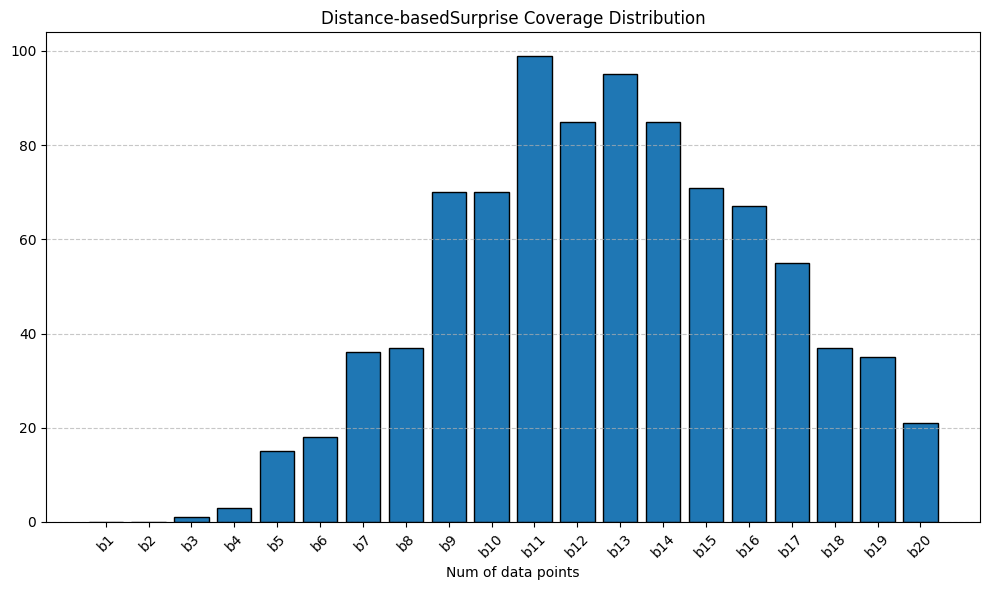


Likelihood-based Surprise Coverage Distribution(Table):
  Bucket              Range  Count  \
0     b1      0.00 - 623.67    395   
1     b2   623.67 - 1247.34     13   
2     b3  1247.34 - 1871.01     43   
3     b4  1871.01 - 2494.68     91   
4     b5  2494.68 - 3118.35     79   
5     b6  3118.35 - 3742.02     70   
6     b7  3742.02 - 4365.69     76   
7     b8  4365.69 - 4989.36     48   
8     b9  4989.36 - 5613.03     49   
9    b10  5613.03 - 6236.70     36   

                                             Indices  
0  [0, 1, 2, 3, 4, 5, 7, 8, 11, 13, 16, 17, 20, 2...  
1  [178, 359, 446, 520, 583, 589, 602, 608, 877, ...  
2  [15, 59, 62, 69, 73, 115, 123, 125, 133, 187, ...  
3  [10, 39, 67, 78, 117, 121, 126, 129, 147, 159,...  
4  [12, 22, 28, 30, 49, 65, 77, 89, 94, 108, 137,...  
5  [6, 9, 19, 42, 47, 51, 72, 104, 106, 124, 145,...  
6  [25, 33, 34, 63, 79, 105, 122, 141, 152, 153, ...  
7  [35, 53, 71, 143, 196, 219, 227, 237, 271, 299...  
8  [57, 74, 116, 120, 138, 18

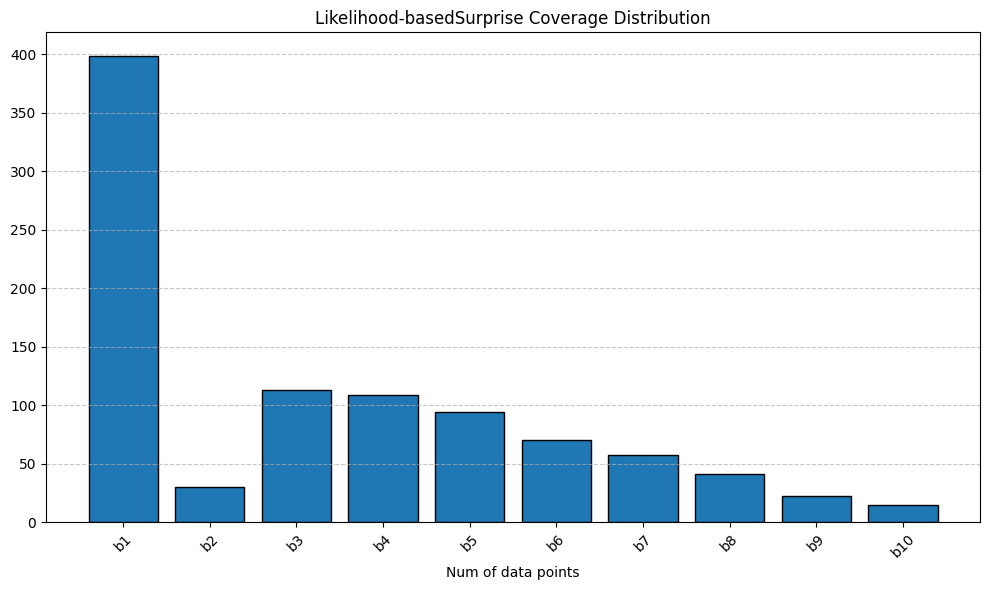

In [22]:
if __name__ == '__main__':
    main()

### #11 License

[required]

In [23]:
## sample ##
ait_owner='AIST'
ait_creation_year='2024'

### #12 Deployment

[uneditable] 

In [24]:
if not is_ait_launch:
    from ait_sdk.deploy import prepare_deploy
    from ait_sdk.license.license_generator import LicenseGenerator
    
    current_dir = %pwd
    prepare_deploy(ait_sdk_name, current_dir, requirements_path)
    
    # output License.txt
    license_generator = LicenseGenerator()
    license_generator.write('../top_dir/LICENSE.txt', ait_creation_year, ait_owner)
